# 🧠 **Öğrenci Depresyonu Tahmin Projesi**
### 🎓 Öğrenciler Arasında Ruh Sağlığı Eğilimlerinin ve Etkileyen Faktörlerin Analizi


## 📌 Projenin Amacı:
Bu proje üniversite öğrencileri arasında görülen depresyon düzeylerini analiz etmeyi ve tahmin etmeyi amaçlamaktadır.

Amaç; depresyona sebep olabilecek demografik, akademik ve yaşam tarzı faktörlerini inceleyerek riskli bireyleri önceden belirleyebilmektir.

Proje; psikoloji, eğitim ve veri bilimi gibi disiplinler arası çalışmalara katkı sunabilecek şekilde tasarlanmıştır.


## 📁 Veri Setinin Özellikleri:
- **Veri Formatı:** CSV (her satır bir öğrenciye ait bilgileri içerir)
- **Tanımlayıcı Bilgi:** Öğrenci ID'si (her birey için eşsiz)
- **Demografik Bilgiler:** Yaş, Cinsiyet, İkamet Şehri
- **Akademik Bilgiler:** Genel Not Ortalaması (CGPA), Akademik Baskı, Çalışma Biçimi
- **Yaşam Tarzı Faktörleri:** Uyku süresi, beslenme düzeni, çalışma saati, iş memnuniyeti
- **Psikolojik ve Sosyal Etkenler:** Ailede ruhsal hastalık geçmişi, finansal stres, intihar düşüncesi geçmişi

Bu açıklamalar veri setini ve projenin bağlamını daha açık ve akademik bir dille sunar.

# Hedef Değişken:
- Depression_Status: Bir öğrencinin depresyon yaşayıp yaşamadığını gösteren ikili gösterge (0/1 veya Evet/Hayır)

---

# 1. Adım: Kütüphanelerin Yüklenmesi ve Veri Setinin Okunması

Bu adımda gerekli Python kütüphaneleri yüklüyoruz ve veri setine genel bir bakış yapıyoruz.

In [70]:
# Gerekli kütüphanelerin yüklenmesi.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import plotly.express as px
import warnings
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

from xgboost import XGBClassifier

# Tüm uyarıları görmezden gelmek için kullanılır. Kodun çıktısını daha temiz hale getirir.
warnings.filterwarnings('ignore')

#Seaborn grafiklerinin stilini ayarlar.
sns.set(style="whitegrid")
%matplotlib inline

- pandas: Veri manipülasyonu ve analizi için.
- numpy: Sayısal işlemler için.
- matplotlib.pyplot: Temel veri görselleştirme için.
- seaborn: İstatistiksel veri görselleştirme için.
- re: Düzenli ifadeler (regular expressions) için.
- scipy.stats: İstatistiksel testler için.
- sklearn.model_selection: Makine öğrenimi modellerini eğitmek ve değerlendirmek için.
- sklearn.preprocessing: Veri önişleme için.
- sklearn.linear_model: Lojistik regresyon modeli için.
- sklearn.ensemble: Rastgele orman (Random Forest) modeli için.
- sklearn.metrics: Model performansını değerlendirmek için.
- plotly.express: Etkileşimli görselleştirmeler için.
- warnings: Uyarıları yönetmek için.

In [5]:
# CSV dosyasını bir Pandas DataFrame'ine atama.
df = pd.read_csv("/content/student_depression_dataset.csv")

In [6]:
# DataFrame'in ilk 5 satırını yazdırır. Veri setinin içeriğine hızlıca göz atmayı sağlar.
print("🔹 İlk 5 satır:")
df.head()

🔹 İlk 5 satır:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
# Veri yapısını ve eksik değerleri kontrol et
print("\n🔹 Veri Seti Özeti:")

from prettytable import PrettyTable

# Veri setindeki her sütunun adını, kaç tane boş olmayan değer içerdiğini ve veri tipini yazdırır. Bu işlem veri setinin genel yapısını anlamak için önemlidir.
def pretty_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Non-Null Count", "Dtype"]

    for col in df.columns:
        non_null_count = df[col].count()
        dtype = df[col].dtype
        table.add_row([col, non_null_count, dtype])

    print(table)

pretty_info(df)

# DataFrame'in boyutlarını (satır ve sütun sayısını) yazdırır.
print("\n🔹 Veri Seti Boyutu:")
df.shape


🔹 Veri Seti Özeti:
+---------------------------------------+----------------+---------+
|                 Column                | Non-Null Count |  Dtype  |
+---------------------------------------+----------------+---------+
|                   id                  |     27901      |  int64  |
|                 Gender                |     27901      |  object |
|                  Age                  |     27901      | float64 |
|                  City                 |     27901      |  object |
|               Profession              |     27901      |  object |
|           Academic Pressure           |     27901      | float64 |
|             Work Pressure             |     27901      | float64 |
|                  CGPA                 |     27901      | float64 |
|           Study Satisfaction          |     27901      | float64 |
|            Job Satisfaction           |     27901      | float64 |
|             Sleep Duration            |     27901      |  object |
|             

(27901, 18)

prettytable ile tablo biçiminde veri yapısı gösterimi sağlandı.

Veri seti: 27901 gözlem, 18 özellik içeriyor.

In [8]:
# DataFrame'deki sayısal sütunların temel istatistiklerini (ortalama, standart sapma, min, max, vb.) ve kategorik sütunların frekans bilgilerini yazdırır.
# Bu işlem veri setinin dağılımı ve özetlenmesi için kullanılır.
print("\n🔹 Temel İstatistikler:")
df.describe(include='all')


🔹 Temel İstatistikler:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


# 2. Adım: Veri Ön İşleme ve Eksik Veri Kontrolleri

Bu adımda veri setindeki sütunların veri tipleri düzenlenir, bazı sütunlardaki değerler temizlenir ve eksik veri kontrolü yapılır.

In [9]:
# 'Depression' sütununu integer veri tipine dönüştürür. Bu işlem sütunun sayısal işlemler için uygun olmasını sağlar.
df['Depression'] = df['Depression'].astype(int)


# Kategorik olarak ele alınması gereken sütunların bir listesini tanımlar.
cat_cols = ['Gender', 'City', 'Profession', 'Degree',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness']

# Yukarıda tanımlanan sütunları 'category' veri tipine dönüştürür. Bu işlem bellek kullanımını optimize eder ve bazı analizler için gereklidir.
for col in cat_cols:
    df[col] = df[col].astype('category')

# Bu sütunlardaki benzersiz değerleri yazdırır. Bu işlem sütunların içeriğini anlamak ve temizlik stratejileri belirlemek için önemlidir.
print("Unique values in 'Sleep Duration':", df['Sleep Duration'].unique())
print("Unique values in 'Financial Stress':", df['Financial Stress'].unique())

Unique values in 'Sleep Duration': ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Unique values in 'Financial Stress': ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


'Depression' sütunu sayısal hale getirilerek model eğitimi için hazırlanıyor.

astype('category') kullanımı, bu sütunlardaki verilerin sınıf (kategori) olarak algılanmasını sağlar.

Bu işlem bellek kullanımı ve model performansı açısından önemlidir.

unique() komutları sayesinde sütunlarda tutarsız veya temizlenmesi gereken değerler olup olmadığı kontrol edilir.

In [10]:
# 'Sleep Duration' sütunundaki metinlerden sayısal saat değerlerini çıkarmak için düzenli ifadeler kullanır. Bu işlem sütundaki veriyi analiz edilebilir hale getirir.
def extract_hours(s):
    # Bir sayı bulma (decimal değerler dahil)
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

df['Sleep Duration'] = df['Sleep Duration'].apply(extract_hours)

# 'Financial Stress' sütununu 'category' veri tipine dönüştürür.
df['Financial Stress'] = df['Financial Stress'].astype('category')

# Değişikliklerin doğru yapıldığını doğrulamak için bu sütunların ilk birkaç satırını yazdırır.
print(df[['Sleep Duration', 'Financial Stress']].head())

   Sleep Duration Financial Stress
0             5.0              1.0
1             5.0              2.0
2             5.0              1.0
3             7.0              5.0
4             5.0              1.0


extract_hours fonksiyonu, örneğin "5-6 hours" gibi metinlerden 5.0 değerini çıkarır.

Bu dönüşüm, uyku süresi üzerinde sayısal analiz ve görselleştirme yapabilmemizi sağlar.

'Financial Stress' sütunu daha önce sayısal gibi görünse de aslında sınıfsal bir bilgi (1–5 gibi), bu nedenle kategorik yapılması daha anlamlı.

In [11]:
# Her sütundaki eksik değerlerin sayısını hesaplar.
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64


Bu adım veri temizliği için temel oluşturur.

Eksik veri tespiti modelin doğruluğunu doğrudan etkileyebilir.

Örneğin, Sleep Duration sütununda 18 eksik değer olduğu görülmüştür.

In [12]:
# 'Sleep Duration' sütunundaki eksik değerleri sütunun medyanı ile doldurur. Medyan, aykırı değerlerden etkilenmediği için tercih edilir.
for col in ['Sleep Duration']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

Ortalama yerine medyanın kullanılması uç değerlerden etkilenmemek için tercih edilir.

inplace=True ile veri seti yerinde değiştirilir.

---

# Adım 3: Keşifsel Veri Analizi (EDA)

Bu adımda veri setindeki değişkenlerin dağılımları ve ilişkileri görselleştirilir ardından buna bağlı olarak analiz edilir.

---

## 3.1 Hedef Değişkenin Dağılımı (Depression)

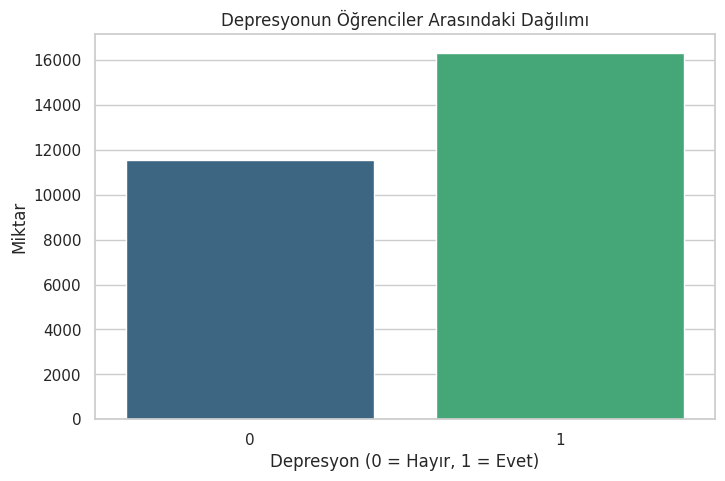

In [13]:
# 'Depression' sütunundaki değerlerin (0 ve 1) sayısını gösteren bir çubuk grafik oluşturur. Bu işlem depresyon durumunun veri setindeki dağılımını anlamak için kullanılır.
plt.figure(figsize=(8,5))
sns.countplot(x='Depression', data=df, palette="viridis")
plt.title("Depresyonun Öğrenciler Arasındaki Dağılımı")
plt.xlabel("Depresyon (0 = Hayır, 1 = Evet)")
plt.ylabel("Miktar")
plt.show()

---
# 📊 Grafik Analizi: Depresyonun Öğrenciler Arasındaki Dağılımı

## 🔍 Grafikte Ne Gösteriliyor?
Bu grafik veri setindeki öğrencilerin depresyon durumuna göre (0: Hayır, 1: Evet) dağılımını göstermektedir.

Yatay eksende (x) depresyon durumu (Depresyon sütunu) yer alıyor:

0 = Depresyonda değil

1 = Depresyonda

Dikey eksende (y) ise her sınıfa ait gözlem (kişi) sayısı, yani frekans gösteriliyor.

Miktar etiketi ile gösterilen değerler yaklaşık olarak:

0 (Depresyonda olmayanlar): 11.500 civarı

1 (Depresyonda olanlar): 16.300 civarı

## 📌 Yorum:
Veri setinde depresyonda olduğunu belirten öğrencilerin sayısı depresyonda olmayanlardan belirgin şekilde fazla.

Bu dağılım dengesiz bir sınıf yapısına işaret eder.

---

# 3.2 Kategorik Değişkenlerin Analizi:

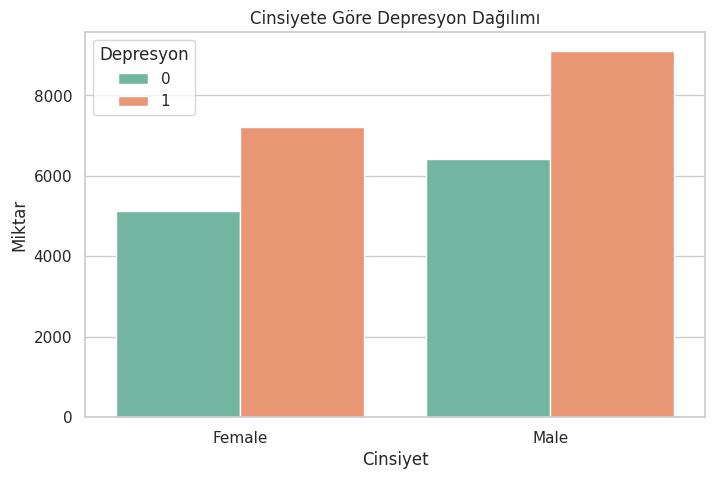

In [14]:
# Cinsiyet ve depresyon durumu arasındaki ilişkiyi gösteren bir gruplanmış çubuk grafik oluşturur. Bu işlem depresyonun cinsiyete göre nasıl değiştiğini anlamak için kullanılır.
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Depression', data=df, palette="Set2")
plt.title("Cinsiyete Göre Depresyon Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Miktar")
plt.legend(title="Depresyon")
plt.show()

---
#📊 Grafik Analizi: Cinsiyete Göre Depresyon Dağılımı
##🔍 Grafikte Ne Gösteriliyor?
Grafik, öğrencilerin cinsiyetlerine göre depresyon durumlarını gruplandırarak gösteriyor.

x ekseni: Cinsiyet (Female, Male)

y ekseni: Öğrenci sayısı (frekans)

Renkler:

Yeşil ton (Depresyon = 0): Depresyonda olmayanlar

Turuncu ton (Depresyon = 1): Depresyonda olanlar

##📌 Yorum:
Her iki cinsiyette de depresyonda olan birey sayısı, olmayanlardan fazla.

Ancak:

Erkek öğrencilerde depresyonda olan birey sayısı, depresyonda olmayanlardan çok daha yüksek (yaklaşık 9000 vs 6400).

Kadın öğrencilerde depresyon dağılımı daha dengeli (yaklaşık 7200 depresyonda vs 5200 değil).

Bu durum veri setinde depresyonun erkeklerde daha yaygın gözlemlendiğini gösteriyor olabilir.

---

# 3.3 Sayısal Değişkenlerin Dağılımı:



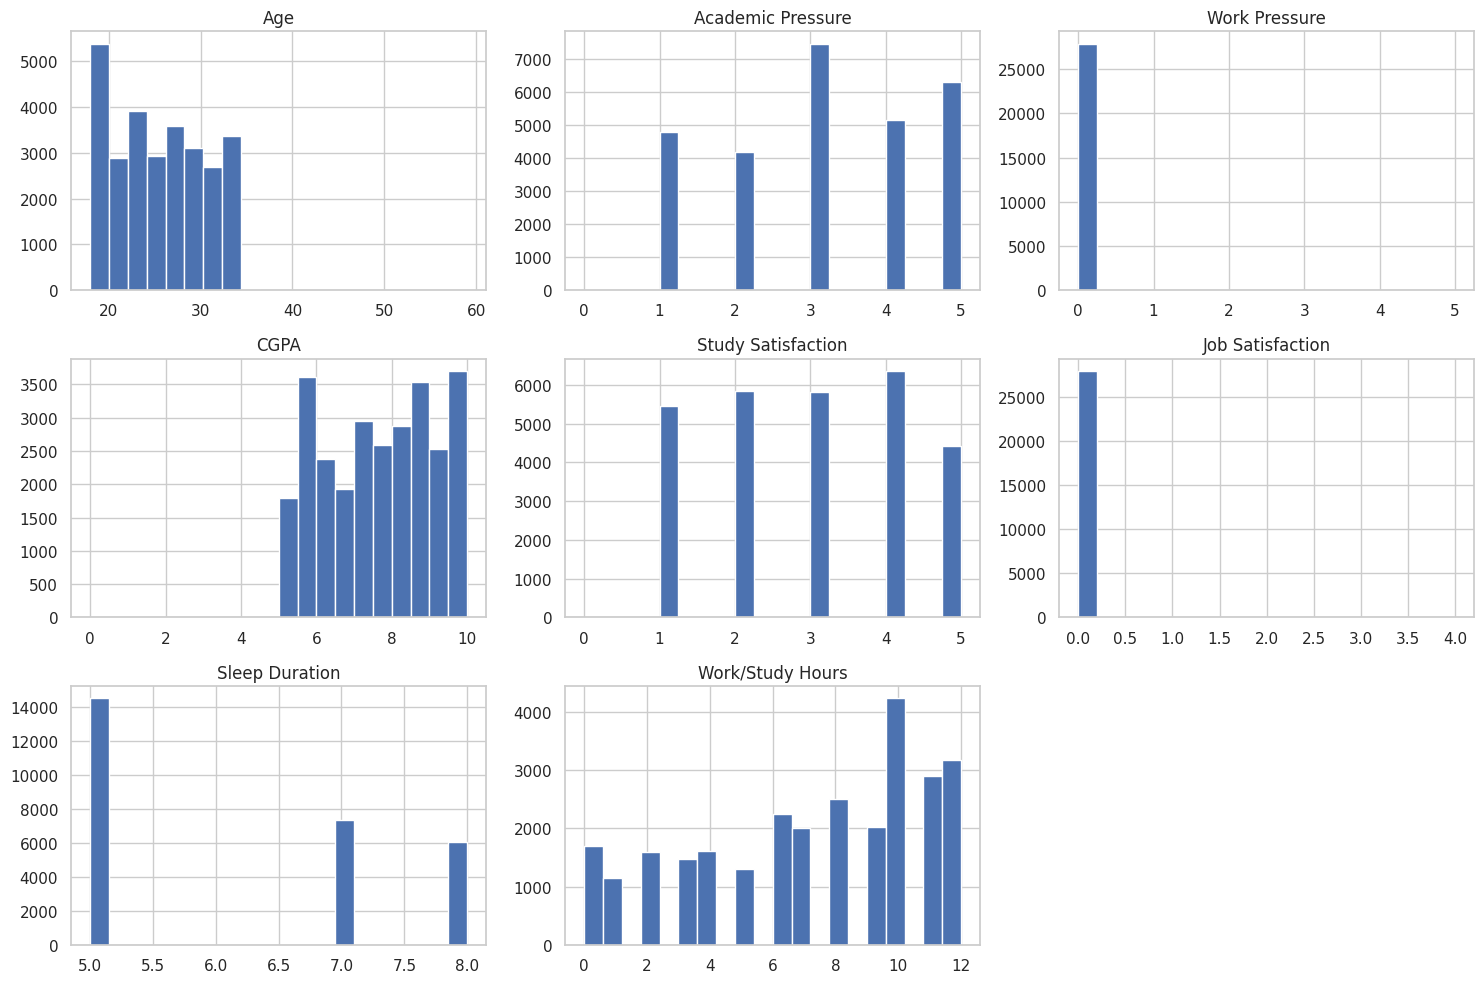

In [15]:
# Belirtilen sayısal sütunların her biri için histogramlar oluşturur. Bu işlem her bir değişkenin dağılımını anlamak için kullanılır.
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
df[num_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

---
# 📊 Grafik Seti Analizi: Sayısal Değişkenlerin Dağılımları
##1️⃣ Age (Yaş)
Yaş dağılımı 18–35 aralığında yoğunlaşmış.

En çok veri 19–21 yaş grubunda.

Yaş arttıkça katılımcı sayısı azalıyor, bu da üniversite öğrencisi profiline uygun.

##2️⃣ Academic Pressure (Akademik Baskı)
1–5 arasında derecelendirilmiş.

En çok 3 seviyesi verilmiş (ortalama düzeyde baskı).

4 ve 5 de yüksek sayıda, bu da birçok öğrencinin yüksek baskı altında olduğunu gösteriyor.

##3️⃣ Work Pressure (İş Baskısı)
Neredeyse tüm değerler 0.

Bu, büyük olasılıkla öğrencilerin büyük kısmının çalışmadığını ya da veride çok az iş baskısı bildirildiğini gösterir.

Veride dengesizlik veya anlamlılık sorunu olabilir.

##4️⃣ CGPA (Genel Not Ortalaması)
Değerler 5.5 – 10 arasında.

En yoğun grup 6.0–6.5 aralığında.

Notlar genel olarak orta ve üzeri seviyede.

##5️⃣ Study Satisfaction (Çalışma Memnuniyeti)
1–5 aralığında.

2, 3 ve 4 seviyelerinde yoğunluk var.

En az memnuniyet “5”te görünüyor, bu biraz şaşırtıcı olabilir.

##6️⃣ Job Satisfaction (İş Memnuniyeti)
Tamamı 0 değeri. Bu, veride:

Ya bu sütun yanlış toplanmış olabilir,

Ya da çoğu öğrenci çalışmadığı için hiç veri girişi olmamış.

Modelleme için anlamsız olabilir, çıkarılabilir.

##7️⃣ Sleep Duration (Uyku Süresi)
Sadece 3 belirgin seviye: 5, 7, 8 saat.

5 saatlik uyku açık farkla önde (yaklaşık 14.000 kişi).

Bu, öğrencilerin çoğunun az uyuduğunu gösterir ve depresyon ile ilişkilendirilebilir.

##8️⃣ Work/Study Hours (Çalışma/Ders Çalışma Saatleri)
0–12 saat aralığında.

En çok 10–12 saatlik yoğun çalışma grubu var.

0–4 saat bandında da kayda değer katılımcı var.

##✅ Genel Değerlendirme:
Work Pressure ve Job Satisfaction değişkenleri veri bakımından zayıf. Analiz dışı bırakılabilir.

Age, CGPA, Sleep Duration, Work/Study Hours gibi değişkenler modellemeye katkı sağlayabilecek seviyede bilgi taşıyor.

Uyku süresi ve akademik baskı gibi değişkenlerin depresyonla ilişkisi ayrıca test edilmelidir.

---

# 3.4 Korelasyon Analizi:


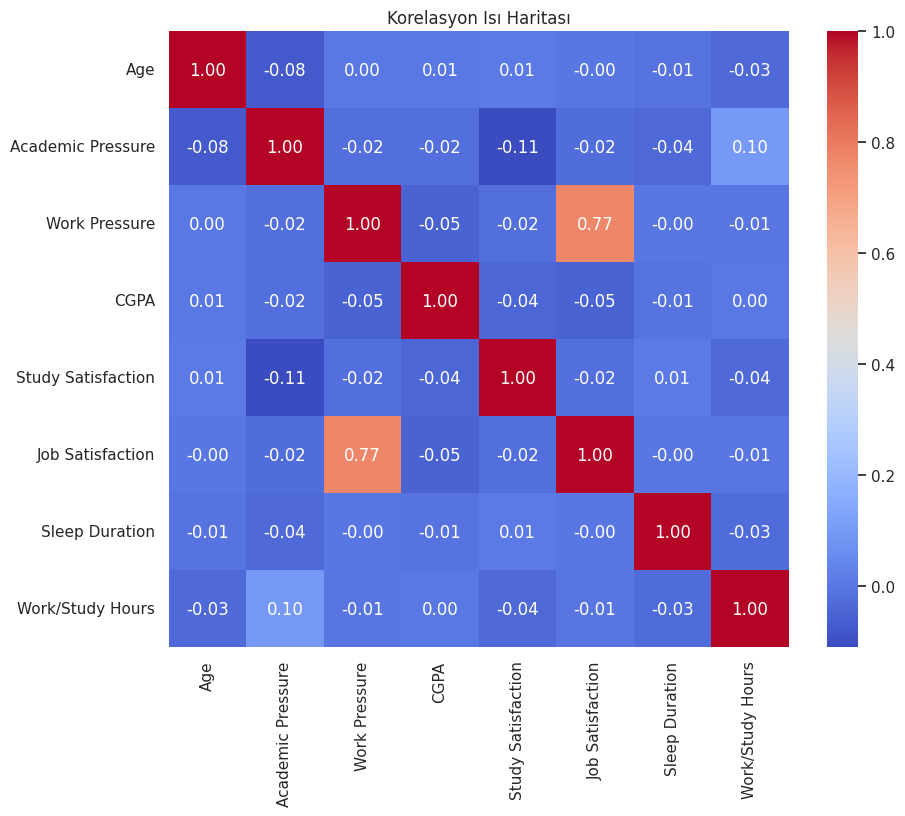

In [16]:
# Belirtilen sayısal sütunlar arasındaki korelasyon matrisini hesaplar.
plt.figure(figsize=(10,8))
num_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
            'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
corr_matrix = df[num_cols].corr()

# Korelasyon matrisini bir ısı haritası olarak görselleştirir. Bu işlem değişkenler arasındaki ilişkilerin gücünü ve yönünü anlamak için kullanılır.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Isı Haritası")
plt.show()

---
#📊 Grafik Analizi: Korelasyon Isı Haritası
##🔍 Ne Gösteriyor?
Grafik, değişken çiftleri arasındaki Pearson korelasyon katsayısını gösteriyor.

Renk skalası:

Kırmızıya yakın renkler: Pozitif korelasyon (0.0 → +1.0)

Maviye yakın renkler: Negatif korelasyon (0.0 → -1.0)

Beyaz/soluk renkler: Korelasyon yok veya çok düşük

##📌 Dikkat Çeken Bulgular:
✅ En Yüksek Pozitif Korelasyonlar:
Work Pressure ↔ Job Satisfaction: 0.77

Bu oldukça yüksek bir korelasyon.

Bu iki sütun muhtemelen aynı kaynaktan otomatik olarak 0 olarak girilmişti; bu nedenle veri kalitesi şüpheli olabilir.

Aynı zamanda job satisfaction sütunu daha önce de sadece 0 değerindeydi, yani anlamlı bilgi taşımıyor.

##🧊 Negatif veya Zayıf Korelasyonlar:
Tüm diğer ilişkiler zayıf:

Academic Pressure ↔ Study Satisfaction: -0.11

Akademik baskı arttıkça çalışma memnuniyeti biraz azalıyor olabilir.

Age ↔ Academic Pressure: -0.08

Yaş arttıkça akademik baskı hissi biraz azalıyor olabilir.

##⚠️ Neredeyse Hiç Korelasyon Olmayanlar:
CGPA, Sleep Duration, Work/Study Hours gibi değişkenlerin hemen hemen tüm diğer sütunlarla korelasyon değeri |0.00 – 0.05| aralığında.

Bu, bu değişkenlerin birbirlerinden bağımsız değişkenler olduğunu gösterir.

##🧠 Yorum:
Değişkenler arasında genel olarak güçlü doğrusal ilişkiler bulunmuyor.

Bu, modellemeye başlarken:

Multicollinearity (çoklu doğrusal ilişki) sorununun düşük olduğu anlamına gelir (iyi bir şey).

Ancak bu aynı zamanda modelin güçlü tahminler yapması için daha fazla karmaşık etkileşim (interaction) gerekebileceğini gösterir.

---

# 3.5 Plotly ile Gelişmiş Görselleştirme:


In [17]:
# CGPA ve Çalışma Memnuniyeti arasındaki ilişkiyi gösteren etkileşimli bir saçılım grafiği oluşturur.
# Depresyon durumuna göre renklendirir ve ek bilgiler (yaş, cinsiyet, akademik baskı) sağlar.

fig = px.scatter(df, x="CGPA", y="Study Satisfaction", color="Depression",
                 hover_data=['Age', 'Gender', 'Academic Pressure'],
                 title="Depresyona Göre CGPA ve Eğitim Memnuniyeti")
fig.show()

---

# 📊 Grafik Analizi: Depresyona Göre CGPA ve Eğitim Memnuniyeti
##🔍 Ne Gösteriyor?
X ekseni: CGPA (Genel Not Ortalaması)

Y ekseni: Study Satisfaction (Eğitim/Çalışma Memnuniyeti), 0 ile 5 arası derecelendirilmiş

Renk: Depresyon durumu (0 = depresyonda değil, 1 = depresyonda)

Sarı: Depresyonda olan öğrenciler

Mor: Depresyonda olmayan öğrenciler

Aradaki renk tonları ise görselde arada kalan yumuşak geçişli olasılık gibi görünür ancak bu durumda büyük ihtimalle sadece 0 ve 1 değerleri var, yani iki sınıf.

##📌 Yorumlar:
###1️⃣ Genel Dağılım:
Çoğu öğrenci 6.0 ile 9.5 CGPA arasında yoğunlaşmış.

Eğitim memnuniyeti açısından en fazla veri seviye 3–4 civarında.

Çalışma memnuniyeti düşük olanlarda da, yüksek olanlarda da depresyon vakaları gözlemleniyor.

###2️⃣ Depresyon Rengine Göre Değerlendirme:
Tüm CGPA seviyelerinde depresyonda olan bireyler (sarı) var.

Yani not ortalaması yüksek olanlar da depresyonda olabilir.

Dolayısıyla CGPA ile depresyon arasında güçlü bir ilişki gözlemlenmiyor.

Study Satisfaction değeri 0–1 olan bireylerde depresyon (sarı) çok yaygın.

Bu, çalışma memnuniyetinin düşük olmasının depresyonla güçlü bir ilişkiye sahip olabileceğini gösteriyor.

---

# Adım 4: İstatistiksel Analiz

Bu adımda akademik baskı ile depresyon arasındaki ilişkiyi istatistiksel olarak test etmek için hipotez testleri uygulanır.


---



# 4.1 Hipotez Testi (Akademik Baskı ve Depresyon)


In [18]:
# Veri setini depresyonu olan ve olmayan öğrencilere göre iki gruba ayırır.
group_dep = df[df['Depression'] == 1]['Academic Pressure']
group_non_dep = df[df['Depression'] == 0]['Academic Pressure']

# Her iki grubun boyutunu yazdırır. İstatistiksel testlerin uygulanabilirliği için grup boyutları önemlidir.
print("Depresyonda olan grup büyüklüğü:", len(group_dep))
print("Depresyonda olmayan grup büyüklüğü:", len(group_non_dep))

# Her iki grupta da yeterli sayıda gözlem varsa (en az 3) testleri uygular.
if len(group_dep) >= 3 and len(group_non_dep) >= 3:
    # İki bağımsız grup arasındaki ortalama farkı test etmek için t-testi uygular.
    t_stat, p_val = stats.ttest_ind(group_dep, group_non_dep)
    print("T-test istatistiği: {:.3f}, p-value: {:.3f}".format(t_stat, p_val))

    # İki bağımsız grup arasındaki dağılım farkını test etmek için Mann-Whitney U testini uygular (non-parametrik test).
    u_stat, p_val_u = stats.mannwhitneyu(group_dep, group_non_dep)
    print("Mann-Whitney U test istatistiği: {:.3f}, p-value: {:.3f}".format(u_stat, p_val_u))
else:
    print("Gruplardan biri istatistiksel test için yeterli gözlem sayısına sahip değildir.")

Depresyonda olan grup büyüklüğü: 16336
Depresyonda olmayan grup büyüklüğü: 11565
T-test istatistiği: 90.119, p-value: 0.000
Mann-Whitney U test istatistiği: 145556846.500, p-value: 0.000


Test sonuçları (t-istatistiği, p-değeri, U-istatistiği, p-değeri) yazdırılır. P-değeri, hipotezin (gruplar arasında fark yok) doğru olma olasılığını gösterir. Düşük bir p-değeri (genellikle < 0.05) hipotezin reddedilmesi gerektiğini gösterir.

---

# Adım 5: Veri Tanımlayıcısı Çoğaltma

Bu adımda yeni özellikler oluşturulur ve kategorik değişkenler üretilir.

---

# 5.1 Bileşik Özellikler Oluşturma
Örneğin; Akademik ve İş Baskısını “Toplam Baskı” metriğinde birleştirelim.

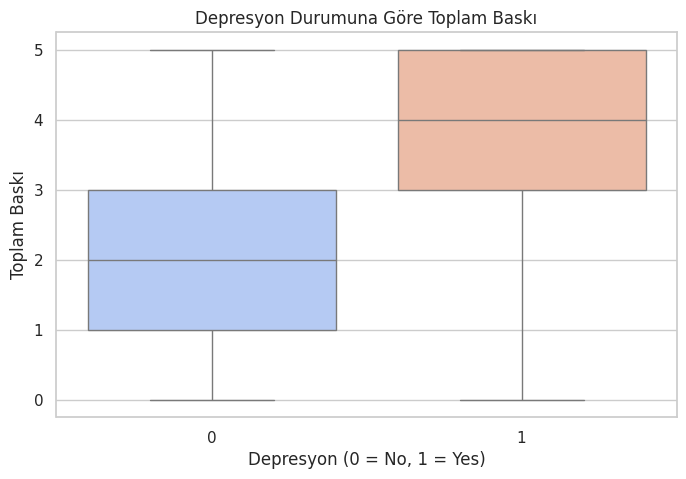

In [19]:
# 'Academic Pressure' ve 'Work Pressure' sütunlarını toplayarak 'Total Pressure' adında yeni bir sütun oluşturur. Bu işlem toplam baskı düzeyini temsil eder.
df['Total Pressure'] = df['Academic Pressure'] + df['Work Pressure']

plt.figure(figsize=(8,5))
sns.boxplot(x='Depression', y='Total Pressure', data=df, palette="coolwarm")
plt.title("Depresyon Durumuna Göre Toplam Baskı")
plt.xlabel("Depresyon (0 = No, 1 = Yes)")
plt.ylabel("Toplam Baskı")
plt.show()

# 📊 Ne Gösteriyor Bu Grafik?
Bu grafik Total Pressure (Toplam Baskı) değişkeninin, depresyon durumu (0 = Hayır, 1 = Evet) değişkenine göre nasıl dağıldığını göstermektedir.

## 🔍 Grafik Üzerinden Teknik Yorum:
| Grup                  | Ortalama/Medyan       | Baskı Düzeyi          | Yayılım                  |
| --------------------- | --------------------- | --------------------- | ------------------------ |
| **0 (Depresyon yok)** | Medyan yaklaşık **2** | **Daha düşük baskı**  | Geniş yayılım 0–5 arası |
| **1 (Depresyon var)** | Medyan yaklaşık **4** | **Daha yüksek baskı** | Büyük kısmı 3–5 arası    |


##🧠 Önemli Gözlemler:
- Depresyonda olmayan kişiler genellikle 0–3 toplam baskı düzeyine sahip.
- Depresyonda olanlar genellikle 3–5 aralığında daha yüksek baskıya sahip.
- Her iki grup için de aykırı değerler gözükmüyor → veriler düzgün dağılmış.
- Medyanlar arasında ciddi fark var → bu değişken depresyonla ilişkili olabilir.



---



# Adım 6: Kategorik Değişkenlerin İçin Encoding

Makine öğrenimi için sayısal özelliklere ihtiyacımız vardır. Sıralı olmayan kategorik değişkenler için one-hot kodlamasını kullanabiliriz. Basit olması için burada birkaç önemli özelliği kodlayacağız.

In [20]:
# Encoding işlemi uygulanması gereken kategorik sütunların bir listesini tanımlar.
cat_features = ['Gender', 'City', 'Profession', 'Degree',
                'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Financial Stress']

# Belirtilen kategorik sütunları one-hot encoding kullanarak sayısal sütunlara dönüştürür.
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

df_encoded.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?
0,2,33.0,5.0,0.0,8.97,2.0,0.0,5.0,Healthy,3.0,...,False,False,False,True,False,False,False,False,False,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,5.0,Moderate,3.0,...,False,False,False,False,True,True,False,False,False,False
2,26,31.0,3.0,0.0,7.03,5.0,0.0,5.0,Healthy,9.0,...,False,False,False,False,True,False,False,False,False,False
3,30,28.0,3.0,0.0,5.59,2.0,0.0,7.0,Moderate,4.0,...,False,False,False,True,True,False,False,False,True,False
4,32,25.0,4.0,0.0,8.13,3.0,0.0,5.0,Moderate,1.0,...,False,False,False,True,False,False,False,False,False,False




---


# Adım 7: Makine Öğrenimi Modeli Oluşturma

Bu çalışma özelinde 5 farklı model oluşturacağız:
- Logistic Regression
- Decision Tree
- Random Forest
- Random Forest + XGBoost
- KNN



---



## 7.1 Verileri Modelleme için Hazırlama

Özellikleri (X) ve hedefi (y) tanımlayın. Sayısal özelliklerin bir alt kümesini ve kodlanmış kategorik özellikleri kullanırız.

In [21]:
# DataFrame'den istenmeyen sütunları kaldır
# Çıkarılacak sütunların listesi
drop_cols = ['id', 'Depression', 'Have you ever had suicidal thoughts ?',
             'Family History of Mental Illness', 'Gender', 'City',
             'Profession', 'Degree', 'Financial Stress']
# Belirtilen sütunları çıkararak yeni bir DataFrame oluştur
df_clean = df.drop(columns=drop_cols)

# Kategorik sütunları one-hot coding ile sayısal hale getir
df_encoded = pd.get_dummies(df_clean, drop_first=True)

In [22]:
# Encoding işleminden sonraki sütunları yazdır (hata ayıklama için)
print("Encoding sonrası sütunlar:", df_encoded.columns.tolist())

# Encoding uygulanan orijinal kategorik sütunların anahtarlarını tanımla
cat_keys = ["Have you ever had suicidal thoughts ?", "Family History of Mental Illness",
            "Gender", "City", "Profession", "Degree", "Financial Stress"]

# Orijinal kategorik sütunlardan türetilen kukla (dummy) sütunları belirle
dummy_cols = [col for col in df_encoded.columns if any(key in col for key in cat_keys)]

# Çıkarılacak sütunların listesini oluştur
drop_cols = []
for col in ['id', 'Depression']:  # 'id' ve 'Depression' sütunlarını kontrol et
    if col in df_encoded.columns:  # Eğer sütun varsa
        drop_cols.append(col)  # Listeye ekle
drop_cols += dummy_cols  # Kukla sütunları çıkarılacaklar listesine ekle

# Belirlenen sütunları çıkararak özellik matrisini oluştur
X = df_encoded.drop(columns=drop_cols)
if 'Depression' in df_encoded.columns:  # Eğer 'Depression' sütunu hala varsa
    y = df_encoded['Depression']  # Hedef değişkeni kodlanmış veriden al
else:
    y = df['Depression']  # Yoksa orijinal veriden al


# Sayısal özellikleri standartlaştırın
from sklearn.preprocessing import StandardScaler  # StandardScaler'ı içe aktar
scaler = StandardScaler()  # StandardScaler nesnesi oluştur
num_feats = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
            'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
            'Work/Study Hours', 'Total Pressure']  # Standartlaştırılacak sayısal sütunları seç
X[num_feats] = scaler.fit_transform(X[num_feats])  # Sayısal sütunları standartlaştır

print("Özellik matrisi boyutu:", X.shape)  # Özellik matrisinin boyutunu yazdır

Encoding sonrası sütunlar: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Total Pressure', 'Dietary Habits_Moderate', 'Dietary Habits_Others', 'Dietary Habits_Unhealthy']
Özellik matrisi boyutu: (27901, 12)




---


## 7.2 Verileri Eğitim ve Test Kümelerine Ayırma

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

## 7.3 Logistic Regression Model

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72      2343
           1       0.79      0.83      0.81      3238

    accuracy                           0.77      5581
   macro avg       0.77      0.76      0.76      5581
weighted avg       0.77      0.77      0.77      5581



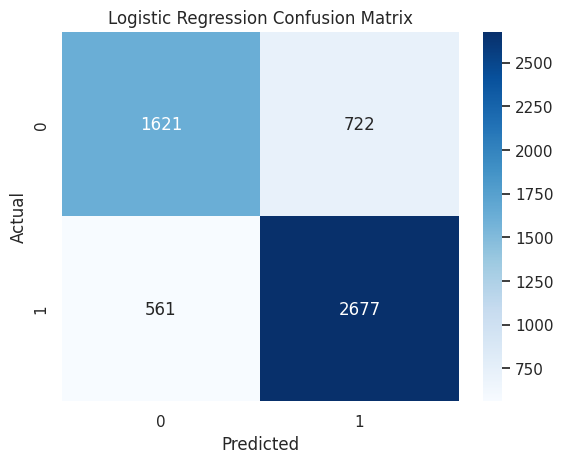

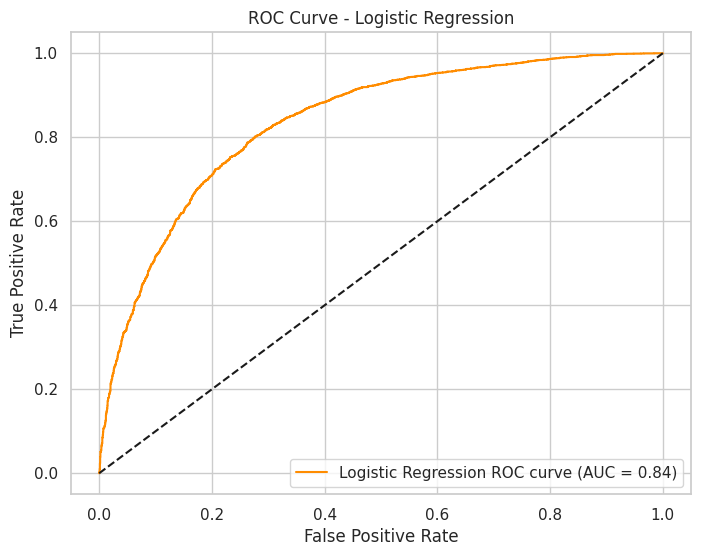

['logistic_regression_model_feature_names.pkl']

In [81]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)  # Lojistik Regresyon modelini 1000 maksimum iterasyon ile oluştur
log_model.fit(X_train, y_train)  # Modeli eğitim verileri (X_train, y_train) ile eğit

# Predictions and evaluation
y_pred_log = log_model.predict(X_test)  # Eğitilmiş modeli kullanarak test verileri (X_test) üzerinde tahmin yap
print("Logistic Regression Classification Report:")  # Lojistik Regresyon sınıflandırma raporunu yazdır
print(classification_report(y_test, y_pred_log))  # Gerçek test etiketleri (y_test) ve tahmin edilen etiketler (y_pred_log) kullanarak sınıflandırma raporunu oluştur ve yazdır

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)  # Gerçek ve tahmin edilen etiketler arasındaki karışıklık matrisini oluştur
sns.heatmap(cm_log, annot=True, fmt="d", cmap='Blues')  # Karışıklık matrisini bir ısı haritası olarak görselleştir (annot=True: değerleri göster, fmt="d": tam sayı formatında göster, cmap='Blues': mavi renk paleti kullan)
plt.title("Logistic Regression Confusion Matrix")  # Grafiğe başlık ekle
plt.xlabel("Predicted")  # X eksenine "Tahmin Edilen" etiketini ekle
plt.ylabel("Actual")  # Y eksenine "Gerçek" etiketini ekle
plt.show()  # Grafiği göster

# ROC Curve
y_prob_log = log_model.predict_proba(X_test)[:, 1]  # Test verileri için sınıf 1 olasılıklarını al
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)  # Gerçek etiketler ve olasılıklar kullanarak ROC eğrisi için yanlış pozitif oranı (fpr), gerçek pozitif oranı (tpr) ve eşikleri hesapla
roc_auc_log = auc(fpr, tpr)  # AUC (Eğri Altındaki Alan) değerini hesapla
plt.figure(figsize=(8, 6))  # Yeni bir figür oluştur
plt.plot(fpr, tpr, label=f'Logistic Regression ROC curve (AUC = {roc_auc_log:.2f})', color='darkorange')  # ROC eğrisini çiz ve AUC değerini etikete ekle
plt.plot([0, 1], [0, 1], 'k--')  # Rastgele tahmin çizgisini (45 derece) çiz
plt.xlabel('False Positive Rate')  # X eksenine "Yanlış Pozitif Oranı" etiketini ekle
plt.ylabel('True Positive Rate')  # Y eksenine "Gerçek Pozitif Oranı" etiketini ekle
plt.title('ROC Curve - Logistic Regression')  # Grafiğe başlık ekle
plt.legend(loc="lower right")  # Legendi sağ alt köşeye yerleştir
plt.show()  # Grafiği göster

joblib.dump(log_model, "logistic_regression_model.pkl")
joblib.dump(X_train.columns.tolist(), "logistic_regression_model_feature_names.pkl")



---
# 📌 Logistic Regression Matrix Hakkında Yorum:

Logistic Regression modeli, depresyonlu bireyleri belirlemede başarılı bir performans göstermektedir.

Toplamda 2677 depresyonlu birey doğru şekilde tahmin edilmiş, 561 kişi ise gözden kaçırılmıştır. Buna karşın, 722 sağlıklı birey hatalı şekilde depresyonlu olarak etiketlenmiştir.

Model depresyonu saptama oranı (recall) açısından güçlüdür (%82.7) ancak yanlış pozitif oranı az da olsa dikkat gerektirir.

---



# 📌 ROC Curve - Logistic Regression Hakkında Yorum:
ROC eğrisine göre Logistic Regression modeli depresyonlu ve depresyonsuz bireyleri ayırmada güçlü bir performans sergilemektedir.

AUC = 0.84 değeri modelin yanlış pozitif oranını düşük tutarken doğru pozitif oranını yüksek tutabildiğini göstermektedir.

Bu skor modelin tahmin yeteneğinin yüksek olduğunu ve klinik ön değerlendirmeler için kullanılabilir olduğunu göstermektedir.


---



## 7.4 Random Forest Classifier

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      2343
           1       0.77      0.81      0.79      3238

    accuracy                           0.75      5581
   macro avg       0.74      0.74      0.74      5581
weighted avg       0.75      0.75      0.75      5581



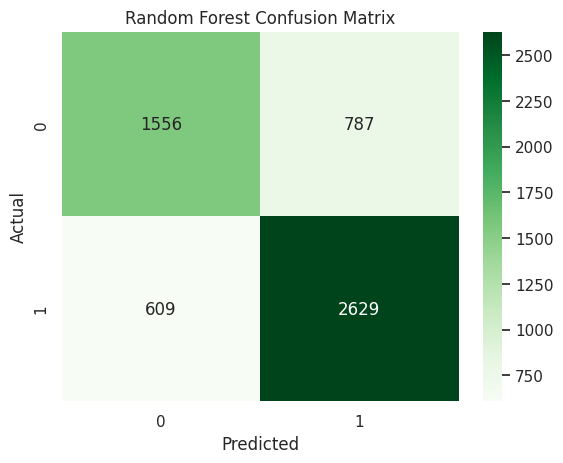

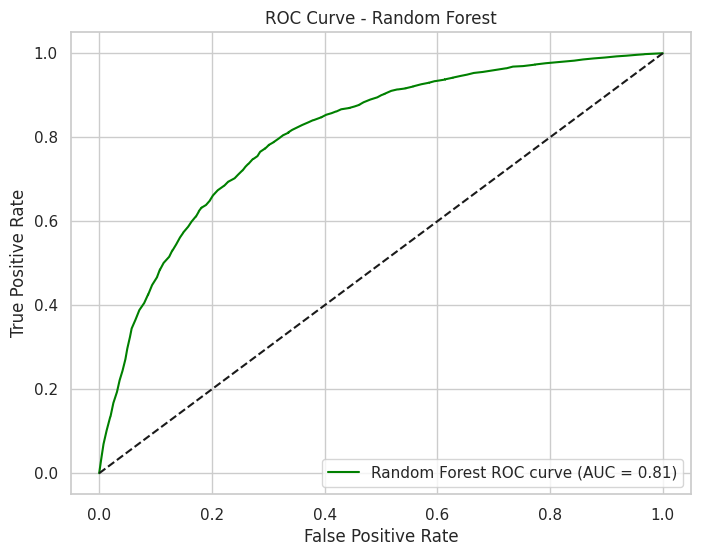

['random_forest_model_feature_names.pkl']

In [49]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 ağaç ve sabit rastgele durum ile Random Forest sınıflandırıcısını oluştur
rf_model.fit(X_train, y_train)  # Modeli eğitim verileri (X_train, y_train) ile eğit

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)  # Eğitilmiş modeli kullanarak test verileri (X_test) üzerinde tahmin yap
print("Random Forest Classification Report:")  # Random Forest sınıflandırma raporunu yazdır
print(classification_report(y_test, y_pred_rf))  # Gerçek test etiketleri (y_test) ve tahmin edilen etiketler (y_pred_rf) kullanarak sınıflandırma raporunu oluştur ve yazdır

# Confusion matrix for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)  # Gerçek ve tahmin edilen etiketler arasındaki karışıklık matrisini oluştur
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Greens')  # Karışıklık matrisini bir ısı haritası olarak görselleştir (annot=True: değerleri göster, fmt="d": tam sayı formatında göster, cmap='Greens': yeşil renk paleti kullan)
plt.title("Random Forest Confusion Matrix")  # Grafiğe başlık ekle
plt.xlabel("Predicted")  # X eksenine "Tahmin Edilen" etiketini ekle
plt.ylabel("Actual")  # Y eksenine "Gerçek" etiketini ekle
plt.show()  # Grafiği göster

# ROC Curve for RF
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Test verileri için sınıf 1 olasılıklarını al
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)  # Gerçek etiketler ve olasılıklar kullanarak ROC eğrisi için yanlış pozitif oranı (fpr), gerçek pozitif oranı (tpr) ve eşikleri hesapla
roc_auc_rf = auc(fpr_rf, tpr_rf)  # AUC (Eğri Altındaki Alan) değerini hesapla
plt.figure(figsize=(8, 6))  # Yeni bir figür oluştur
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})', color='green')  # ROC eğrisini çiz ve AUC değerini etikete ekle
plt.plot([0, 1], [0, 1], 'k--')  # Rastgele tahmin çizgisini (45 derece) çiz
plt.xlabel('False Positive Rate')  # X eksenine "Yanlış Pozitif Oranı" etiketini ekle
plt.ylabel('True Positive Rate')  # Y eksenine "Gerçek Pozitif Oranı" etiketini ekle
plt.title('ROC Curve - Random Forest')  # Grafiğe başlık ekle
plt.legend(loc="lower right")  # Legendi sağ alt köşeye yerleştir
plt.show()  # Grafiği göster

joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(X_train.columns.tolist(), "random_forest_model_feature_names.pkl")



---
# 📌 Random Forest Confusion Matrix Hakkında Yorum:

Random Forest modeli, depresyonlu bireyleri yüksek başarıyla tespit etmiştir (recall ≈ %81.2).

Bununla birlikte, 787 sağlıklı birey yanlış şekilde depresyonlu olarak sınıflandırılmıştır.

Bu durum modelin pozitif sınıfı fazla tahmin etme eğiliminde olduğunu, ancak depresyonlu bireyleri kaçırma oranının düşük olduğunu göstermektedir.

Modelin genel doğruluğu yaklaşık %74.9’dur.

---



# 📌 ROC Curve - Random Forest Hakkında Yorum:

ROC eğrisi modelin depresyonlu bireyleri depresyonsuzlardan ayırt etme becerisinin yüksek olduğunu göstermektedir.

AUC değeri olan 0.81, modelin tahmin başarısının rastgele seçimden çok daha üstün olduğunu ve pozitif sınıfı ayırt etme kapasitesinin oldukça tatmin edici olduğunu ortaya koymaktadır.


---



## 7.5 KNN Classifier

KNN Sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      2343
           1       0.78      0.82      0.80      3238

    accuracy                           0.76      5581
   macro avg       0.76      0.75      0.75      5581
weighted avg       0.76      0.76      0.76      5581



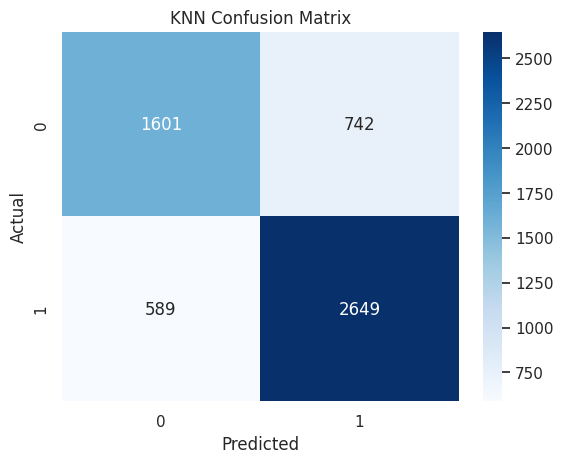

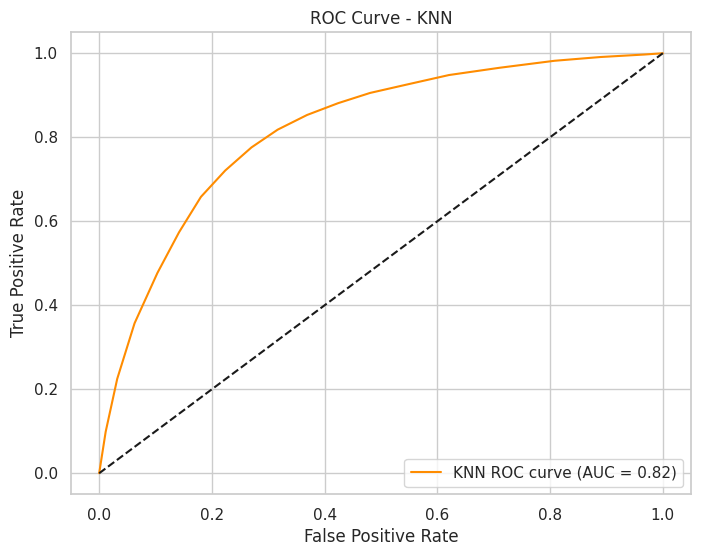

['knn_model_feature_names.pkl']

In [66]:
# KNN (K-En Yakın Komşu) sınıflandırıcı modelini oluştur (komşu sayısı 18 olarak ayarlandı)
knn_model = KNeighborsClassifier(n_neighbors=18)

# Modeli eğitim verisi ile eğit
knn_model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yap
y_pred_knn = knn_model.predict(X_test)

# KNN sınıflandırma performans raporunu yazdır
print("KNN Sklearn Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Karışıklık matrisi oluştur ve görselleştir
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap='Blues')
plt.title("KNN Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# ROC eğrisi için tahmin olasılıklarını al (pozitif sınıf için)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# ROC eğrisi metriklerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'KNN ROC Eğrisi (AUC = {roc_auc_knn:.2f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--')  # Rastgele sınıflandırma çizgisi
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi - KNN')
plt.legend(loc="lower right")
plt.show()

# Modeli ve kullandığı özellik isimlerini .pkl dosyası olarak kaydet
joblib.dump(knn_model, "knn_model.pkl")
joblib.dump(X_train.columns.tolist(), "knn_model_feature_names.pkl")




---
# 📌 KNN Confusion Matrix Hakkında Yorum:

KNN modelinin oluşturduğu karışıklık matrisi, modelin depresyon var (1) sınıfını belirlemede güçlü olduğunu göstermektedir.

Toplamda 2649 doğru pozitif tahmin yapılırken, sadece 589 depresyonlu birey gözden kaçırılmıştır. Ancak 742 sağlıklı birey yanlış şekilde depresyonlu olarak sınıflandırılmıştır.

Bu modelin bazı durumlarda fazla uyarıcı olabileceğini ancak depresyonu kaçırma oranının düşük olduğunu göstermektedir.

---



# 📌 ROC Curve - KNN Hakkında Yorum:
ROC eğrisi modelin depresyonlu ve depresyonsuz bireyleri ayırt etme yeteneğini ölçmektedir.

AUC = 0.82 olması KNN modelinin sınıfları ayırt etme becerisinin oldukça başarılı olduğunu göstermektedir.

Bu skor modelin rastgele tahminden çok daha iyi bir performans sergilediğini ve gerçek pozitif oranını yüksek tutarken yanlış pozitif oranını dengeli tuttuğunu ortaya koymaktadır.



---



## 7.6 Decision Tree Classifier

Decision Tree Sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      2343
           1       0.72      0.73      0.72      3238

    accuracy                           0.68      5581
   macro avg       0.67      0.66      0.67      5581
weighted avg       0.67      0.68      0.67      5581



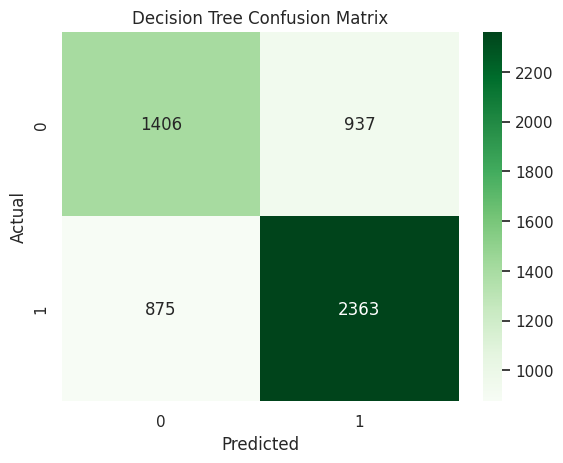

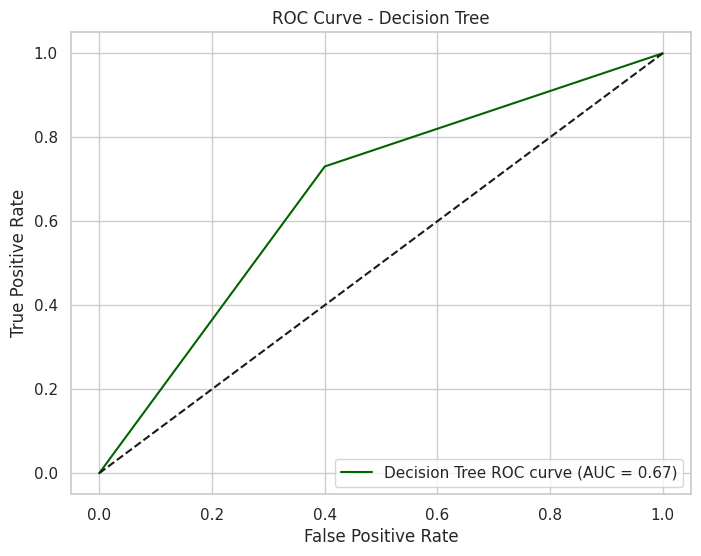

['decision_tree_feature_names.pkl']

In [71]:
# 🎯 Decision Tree Modeli
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 🔮 Tahmin
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Sklearn Classification Report:")
print(classification_report(y_test, y_pred_dt))

# 📊 Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree ROC curve (AUC = {roc_auc_dt:.2f})', color='darkgreen')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# 💾 Modeli ve özellik isimlerini kaydet
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(X_train.columns.tolist(), "decision_tree_feature_names.pkl")




---
# 📌 Decision Tree Confusion Matrix Hakkında Yorum:

Decision Tree modeli depresyonu tespit etme konusunda sınırlı başarı göstermiştir.

Modelin doğruluğu %67.8 olup, bu oran diğer modellere kıyasla daha düşüktür. Hem yanlış pozitif (937 kişi) hem de yanlış negatif (875 kişi) sayısı oldukça yüksektir.

Bu da modelin sınıflar arasında ayrım yapmada kararsız kaldığını ve aşırı öğrenme (overfitting) riskinin yüksek olduğunu gösterir.

---



# 📌 ROC Curve - Decision Tree Hakkında Yorum:
ROC eğrisi modelin depresyonlu bireyleri depresyonsuzlardan ayırt etme yeteneğinin oldukça zayıf olduğunu gösteriyor.

AUC = 0.67 değeri modelin ayırt edici gücünün zayıf olduğunu ve daha gelişmiş modellerin tercih edilmesi gerektiğini ortaya koyuyor.



---



## 7.6 Hybrid Random Forest + XGBoost Hybrid Classifier

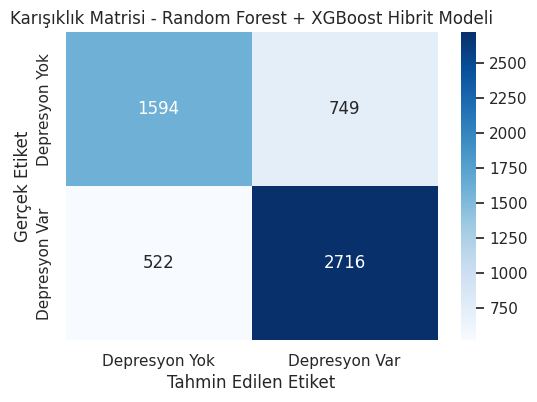

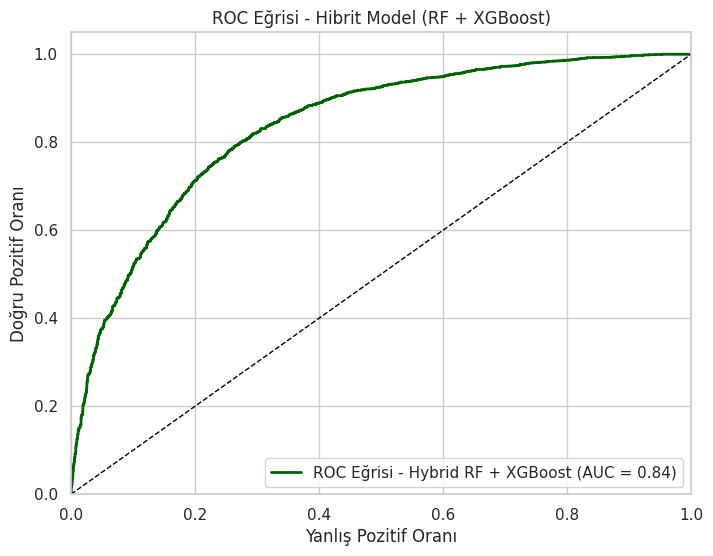

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      2343
           1       0.78      0.84      0.81      3238

    accuracy                           0.77      5581
   macro avg       0.77      0.76      0.76      5581
weighted avg       0.77      0.77      0.77      5581



['random_forest_with_xgboost_model_names.pkl']

In [77]:
# Random Forest + XGBoost Hibrit Modeli

# 🔹 Random Forest Modelini Eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔍 Random Forest'tan özellik önem düzeylerini al
feature_importances = rf_model.feature_importances_

# 🔧 Önemli özellikleri seç (önemi %1'den büyük olanlar)
important_features = X_train.columns[feature_importances > 0.01]
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# 🔹 XGBoost Modelini, seçilen özelliklerle eğit
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, eval_metric='logloss')
xgb_model.fit(X_train_selected, y_train)

# 📊 Tahminleri yap
y_pred4 = xgb_model.predict(X_test_selected)

# 📋 Modeli değerlendir: Karışıklık Matrisi ve Sınıflandırma Raporu
conf_matrix_rf_XGB = confusion_matrix(y_test, y_pred4)
class_report_rf_XGB = classification_report(y_test, y_pred4)

# 🎨 Karışıklık matrisini görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_XGB, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Depresyon Yok', 'Depresyon Var'],
            yticklabels=['Depresyon Yok', 'Depresyon Var'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karışıklık Matrisi - Random Forest + XGBoost Hibrit Modeli')
plt.show()

# 🔍 ROC Eğrisi için pozitif sınıfa ait olasılık tahminlerini al
y_prob4 = xgb_model.predict_proba(X_test_selected)[:, 1]

# 📈 ROC eğrisi metriklerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob4)
roc_auc = auc(fpr, tpr)

# 🎯 ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2,
         label=f'ROC Eğrisi - Hybrid RF + XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi - Hibrit Model (RF + XGBoost)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 🖨️ Sınıflandırma raporunu yazdır
print("Sınıflandırma Raporu:\n", class_report_rf_XGB)

# 💾 Modeli ve seçilen özellik isimlerini .pkl dosyasına kaydet
joblib.dump(xgb_model, "random_forest_with_xgboost_model.pkl")
joblib.dump(important_features.tolist(), "random_forest_with_xgboost_model_names.pkl")




---
# 📌 RF + XGBoost (Hybrid) Confusion Matrix Hakkında Yorum:

Bu hibrit model depresyonlu bireyleri tespit etme açısından oldukça başarılıdır (Recall ≈ %83.9).

Ayrıca doğruluk oranı %77.1 ile diğer klasik modellerin üzerinde seyretmektedir. Yanlış negatif sayısı 522 ile düşük kalmıştır, bu da depresyonu gözden kaçırma riskini en aza indirir.

Precision değeri de oldukça dengeli ve yüksek olup yanlış alarmların da makul düzeyde olduğunu gösterir.

---



# 📌 ROC Curve - RF + XGBoost (Hybrid) Hakkında Yorum:
ROC eğrisi modelin doğru pozitif oranını yüksek tutarken yanlış pozitif oranını kontrol altında tuttuğunu gösteriyor.

AUC değeri olan 0.84, sınıflar arasında güçlü bir ayırt etme yeteneğine işaret eder. ROC eğrisinin eğimi yüksek bu da modelin güvenilirliğini artırır.



---



# 7.7 Modellerin Skor Karşılaştırması

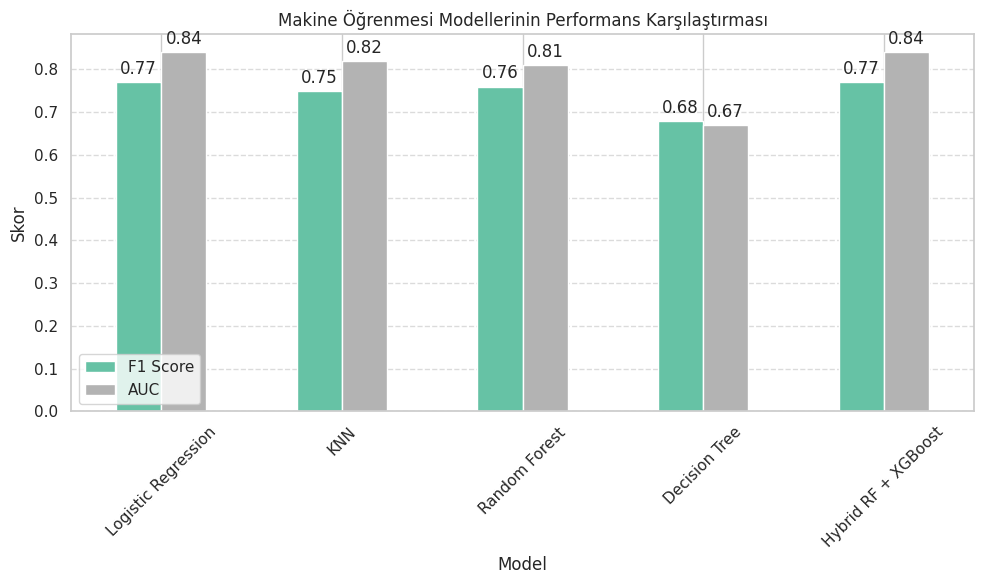

In [80]:
# 🔎 Modellerin F1 ve AUC skorlarını içeren tabloyu oluştur
model_scores = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "KNN",
        "Random Forest",
        "Decision Tree",
        "Hybrid RF + XGBoost"
    ],
    "F1 Score": [0.77, 0.75, 0.76, 0.68, 0.77],
    "AUC": [0.84, 0.82, 0.81, 0.67, 0.84]
})

# 🔢 Model sütununu indeks olarak ayarla ve çubuk grafik çiz
ax = model_scores.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="Set2")

# 🎨 Grafik başlığı ve eksen etiketleri
plt.title("Makine Öğrenmesi Modellerinin Performans Karşılaştırması")
plt.ylabel("Skor")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 🏷️ Her çubuğun üstüne skor değerini yazdır
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# 📊 Grafiği göster
plt.tight_layout()
plt.show()


# Adım 8: Streamlit ile Etkileşimli Arayüz Oluşturma

In [28]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [52]:
!ngrok config add-authtoken 2M9KBRy3QTJS3XDjwUmBjAyRZFG_3hmsrrRZrFF8CpELToR4d

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [53]:
!pip install -q streamlit pyngrok


In [60]:
!streamlit run app.py &>/dev/null &


In [61]:
from pyngrok import ngrok

# Streamlit sunucusu çalıştırılacak port
port = 8501

# Elle http tüneli başlat (yeni yönteme uyumlu)
public_url = ngrok.connect(addr=f"http://localhost:{port}")
print("🔗 Uygulamayı aç:", public_url)


🔗 Uygulamayı aç: NgrokTunnel: "https://27b2-35-245-219-70.ngrok-free.app" -> "http://localhost:8501"
